In [3]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In the previous notebook, we looked at how to build up a Graph manually by adding the nodes and edges directly. This isn't an approach that scales up to larger graphs very naturally, so instead we are going to look at other ways to construct graph object. The first set of examples shown below come directly from networkx, which has the ability to generate many graph (families) automatically. The documentation for the full collection of available networks (and their associated parameters) can be found here: https://networkx.org/documentation/stable//reference/generators.html These include combinatorial graphs, famous examples of networks, and generators for commonly used random network models. We will also look into a few different way to load networks stored in external files as networkx Graph objects.   For each example, I've included a small plot displaying the network.

**Combinatorial Families:**

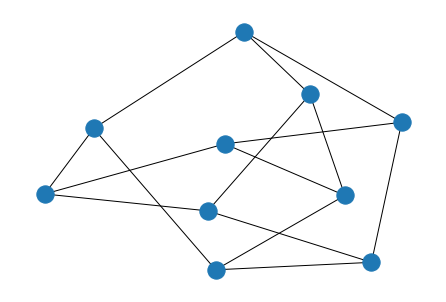

In [4]:
petersen_graph = nx.petersen_graph()
nx.draw(petersen_graph)


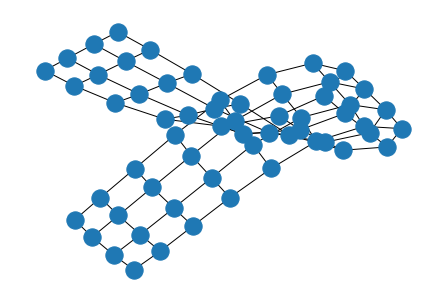

In [9]:
grid_graph_3_5 = nx.grid_graph([4,15])
nx.draw(grid_graph_3_5)

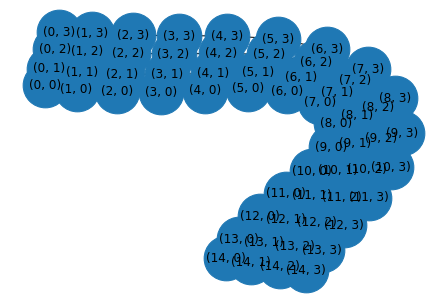

In [10]:
nx.draw(grid_graph_3_5, with_labels = True,node_size = 2000)

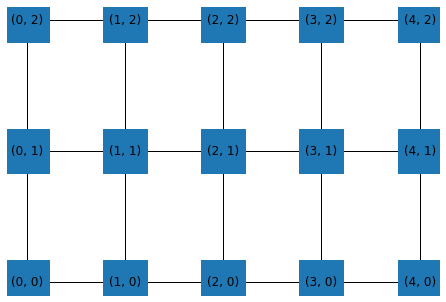

In [5]:
nx.draw(grid_graph_3_5,pos = {name:name for name in grid_graph_3_5.nodes()}, with_labels = True,node_shape='s',node_size = 2000)

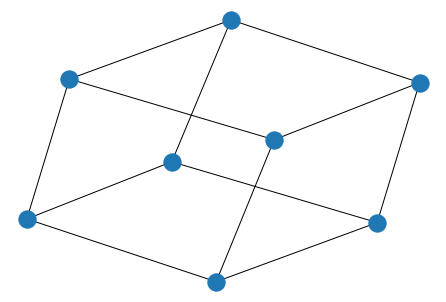

In [6]:
hypercube_3 = nx.hypercube_graph(3)
nx.draw(hypercube_3)

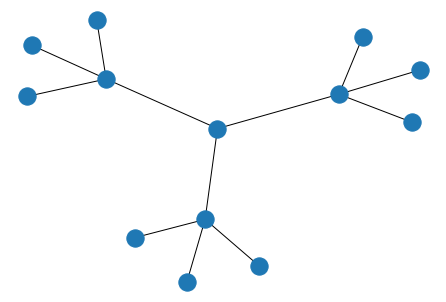

In [7]:
regular_tree_3_2 = nx.balanced_tree(3,2)
nx.draw(regular_tree_3_2)

**Random Graph Families:**

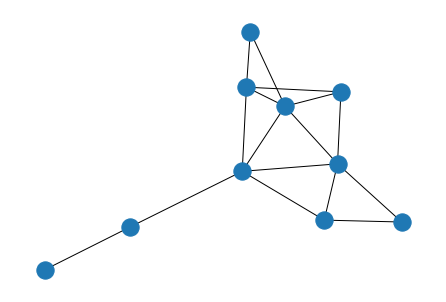

In [11]:
ER_10_30 = nx.erdos_renyi_graph(10,.3)
nx.draw(ER_10_30)
#P. Erdos and A. Renyi: On Random Graphs. I, Publicationes Mathematicae, 6, 290-–297, (1959).

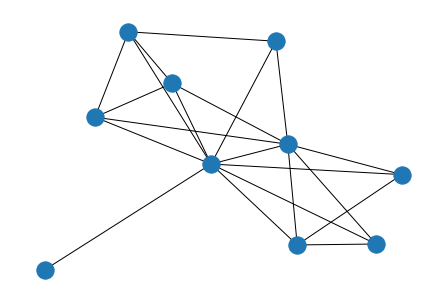

In [12]:
BA_10_3 = nx.barabasi_albert_graph(10,3)
nx.draw(BA_10_3)
#A. Barabasi and R. Albert: Emergence of scaling in random networks, Science, 286 (5439), 509-–512, (1999).

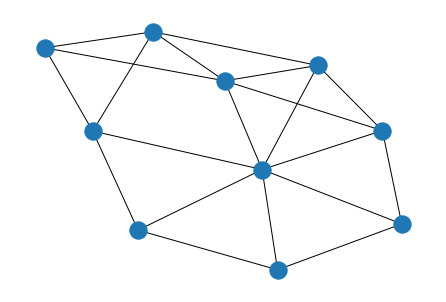

In [13]:
WS_10_4_20 = nx.watts_strogatz_graph(10,4,.2)
nx.draw(WS_10_4_20)
#D. Watts and S. Strogatz,  Collective dynamics of 'small-world' networks, Nature, 393 (6684), 440-–442, (1998).

**Social Network Examples:**

In [14]:
karate_graph = nx.karate_club_graph()
# Original paper: Zachary, Wayne W. “An Information Flow Model for Conflict and Fission in Small Groups.” Journal of Anthropological Research, 33, 452–473, (1977).


In [12]:
karate_graph.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [19]:
karate_graph.nodes[20]

{'club': 'Officer'}

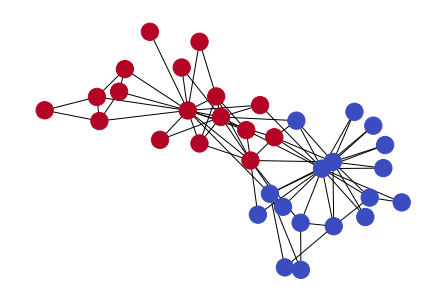

In [24]:
nx.draw(karate_graph, node_color = [karate_graph.nodes[name]['club'] == 'Mr. Hi' for name in karate_graph.nodes()],cmap='coolwarm')

If we want to use plotting to understand different properties of a fixed network, it would be convenient if we could place the nodes in the same position in a sequence of plots. This is done using the pos parameter, which takes as input a dictionary that maps the names of the nodes to odered Cartesian pairs that describe the desired positions. We saw an example of this above with the grid graph already, where we used the names of the nodes to place the nodes in a natural position. For graphs and networks that don't have this nice labelling already, we can compute sets of positions using networkx functions and then reuse them every time we want to reproduce the plot. 

In [25]:
karate_kk_layout = nx.kamada_kawai_layout(karate_graph)
karate_c_layout = nx.circular_layout(karate_graph)
karate_r_layout = nx.random_layout(karate_graph)
karate_s_layout = nx.spectral_layout(karate_graph)

In [27]:
karate_kk_layout

{0: array([0.02595265, 0.3326179 ]),
 1: array([-0.15415402,  0.25105994]),
 2: array([ 0.0728113 , -0.00339834]),
 3: array([0.15120783, 0.23250616]),
 4: array([0.19313544, 0.57445429]),
 5: array([0.18996363, 0.67901702]),
 6: array([-0.00442195,  0.69195753]),
 7: array([0.28351953, 0.21023574]),
 8: array([-0.17565775, -0.00990142]),
 9: array([ 0.0706129, -0.2892516]),
 10: array([0.37980827, 0.53262302]),
 11: array([-0.18776546,  0.6332519 ]),
 12: array([0.43374413, 0.37950471]),
 13: array([-0.08512009,  0.05268195]),
 14: array([-0.50006703, -0.31244432]),
 15: array([-0.46577852, -0.42902512]),
 16: array([0.15957837, 1.        ]),
 17: array([-0.27933097,  0.51420533]),
 18: array([-0.39589978, -0.53439664]),
 19: array([-0.2753847 ,  0.06921986]),
 20: array([-0.29337502, -0.61554258]),
 21: array([-0.37319087,  0.43635094]),
 22: array([-0.15864176, -0.64280202]),
 23: array([ 0.23606481, -0.51550091]),
 24: array([ 0.57008117, -0.29665387]),
 25: array([ 0.54879028, -0.

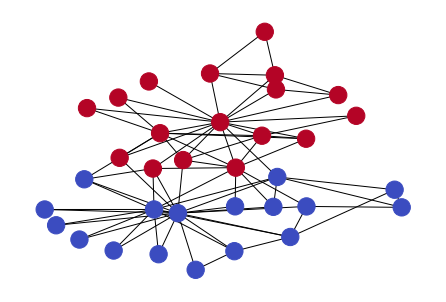

In [31]:
nx.draw(karate_graph, pos = karate_kk_layout, node_color = [karate_graph.nodes[name]['club'] == 'Mr. Hi' for name in karate_graph.nodes()],cmap='coolwarm')

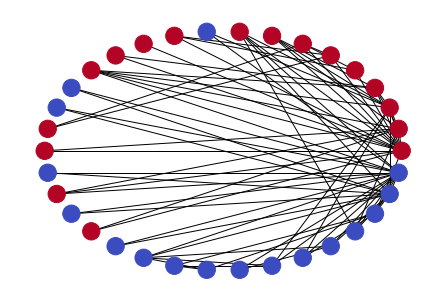

In [32]:
nx.draw(karate_graph, pos = karate_c_layout, node_color = [karate_graph.nodes[name]['club'] == 'Mr. Hi' for name in karate_graph.nodes()],cmap='coolwarm')

**Assignment:** Select one of the small combinatorial graphs from the documentation page linked above and create a pos dictionary that makes the resulting plot look nice. 

**Loading Networks** Many times we will want to analyze data that isn't already known to networkx and will need to load in the network from an external file. The full set of documentation for different file types (and there are a lot of them!) can be found here: https://networkx.org/documentation/stable//reference/readwrite/index.html 

For our purposes, we are going to look at adjacency matrices and .json files, which are both common ways to store network data. The next cells show an example of an adjacency matrix for a dolphin social network (original reference: D. Lusseau, K. Schneider, O. Boisseau, Patti Haase, E.
Slooten, and S. Dawson, The bottlenose dolphin community of Doubtful
Sound features a large proportion of long-lasting associations, Behavioral
Ecology and Sociobiology 54 (2003), no. 4, 396--405. ) and how to convert the matrix in a graph object. The next lines show examples of how to load adjacency matrices from .csv files and the syntax for loading in .json graphs. To perform this importing procedure, we need some additional packages. 

In [33]:
import numpy as np
import requests 
import json
from networkx.readwrite import json_graph

In [34]:
A=[[0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
[0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0],
[0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
[0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
[1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0],
[1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0],
[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
[0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
[0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
[0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
[0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
[1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
[0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0],
[1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
[1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
[0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]]

dolphin_graph = nx.from_numpy_matrix(np.matrix(A))


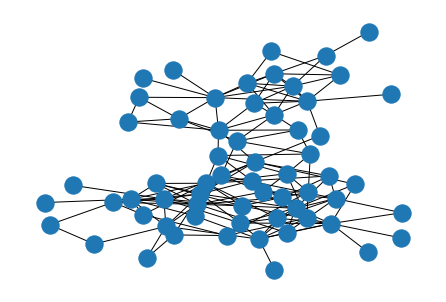

In [35]:
dolphin_kk_layout = nx.kamada_kawai_layout(dolphin_graph)
nx.draw(dolphin_graph, pos = dolphin_kk_layout)

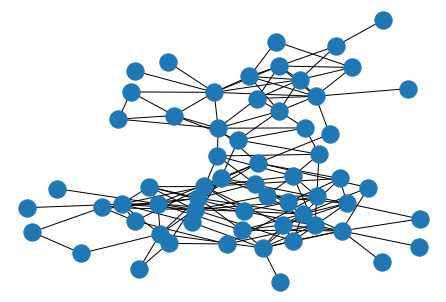

In [22]:
loaded_matrix = np.loadtxt("./dolphins.csv", delimiter=",")
dolphin_graph_loaded = nx.from_numpy_matrix(loaded_matrix)
dolphin_kk_layout_loaded = nx.kamada_kawai_layout(dolphin_graph_loaded)
nx.draw(dolphin_graph_loaded, pos = dolphin_kk_layout_loaded)

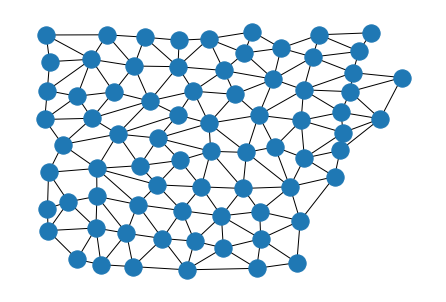

In [36]:
with open('./COUNTY_05.json') as f:
    data = json.load(f)
AR_dual_graph = json_graph.adjacency_graph(data)
AR_geo_pos = {name:(AR_dual_graph.nodes[name]['C_X'],AR_dual_graph.nodes[name]['C_Y']) for name in AR_dual_graph.nodes()}
nx.draw(AR_dual_graph, pos = AR_geo_pos,node_size=300)

In [24]:
AR_dual_graph.nodes[0]

{'boundary_node': True,
 'boundary_perim': 1.3405285599667254,
 'area': 0.1847509792989995,
 'STATEFP10': '05',
 'COUNTYFP10': '107',
 'COUNTYNS10': '00069172',
 'GEOID10': '05107',
 'NAME10': 'Phillips',
 'NAMELSAD10': 'Phillips County',
 'LSAD10': '06',
 'CLASSFP10': 'H1',
 'MTFCC10': 'G4020',
 'CSAFP10': '0',
 'CBSAFP10': '25760',
 'METDIVFP10': 0,
 'FUNCSTAT10': 'A',
 'ALAND10': 1801758335,
 'AWATER10': 82056090,
 'INTPTLAT10': '+34.4258423',
 'INTPTLON10': '-090.8483856',
 'POP10': 21757,
 'UPOP': 11321.0,
 'RPOP': 10436,
 'C_X': -90.84802277201233,
 'C_Y': 34.428291607849424,
 'TOTPOP': 21757,
 'UTOTPOP': 11321.0,
 'RTOTPOP': 10436,
 'NH_WHITE': 7535,
 'UNH_WHITE': 2412.0,
 'RNH_WHITE': 5123,
 'NH_BLACK': 13652,
 'UNH_BLACK': 8652.0,
 'RNH_BLACK': 5000,
 'NH_AMIN': 39,
 'UNH_AMIN': 23.0,
 'RNH_AMIN': 16,
 'NH_ASIAN': 64,
 'UNH_ASIAN': 37.0,
 'RNH_ASIAN': 27,
 'NH_NHPI': 1,
 'UNH_NHPI': 1.0,
 'RNH_NHPI': 0,
 'NH_OTHER': 2,
 'UNH_OTHER': 1.0,
 'RNH_OTHER': 1,
 'NH_2MORE': 177,
 'UN

In the subsequent plots, we play with the colormaps a little,

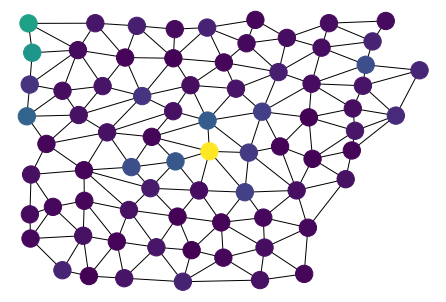

In [25]:
nx.draw(AR_dual_graph, pos = AR_geo_pos,node_size=300,node_color = [AR_dual_graph.nodes[name]['TOTPOP'] for name in AR_dual_graph.nodes()])

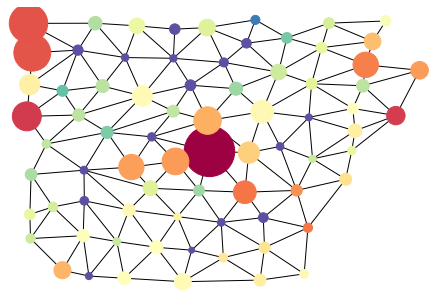

In [26]:
nx.draw(AR_dual_graph, pos = AR_geo_pos,node_color = [AR_dual_graph.nodes[name]['RPOP']/AR_dual_graph.nodes[name]['TOTPOP'] for name in AR_dual_graph.nodes()], node_size = [AR_dual_graph.nodes[name]['TOTPOP']/150 for name in AR_dual_graph.nodes()],cmap = 'Spectral')

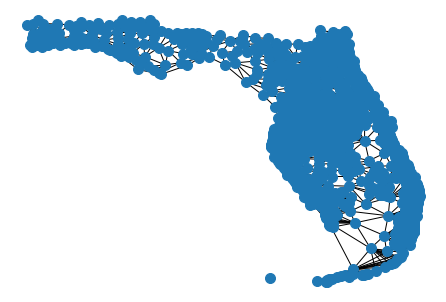

In [59]:
sg = 'TRACT/TRACT_12.json'
url = "https://people.csail.mit.edu/ddeford/" + sg
#More description of the full set of available dual graphs can be found here: https://people.csail.mit.edu/ddeford/dual_graphs
r = requests.get(url)
data = r.json()
FL_dual_graph = json_graph.adjacency_graph(data)
FL_geo_pos = {name:(FL_dual_graph.nodes[name]['C_X'],FL_dual_graph.nodes[name]['C_Y']) for name in FL_dual_graph.nodes()}
nx.draw(FL_dual_graph, pos = FL_geo_pos,node_size=100)

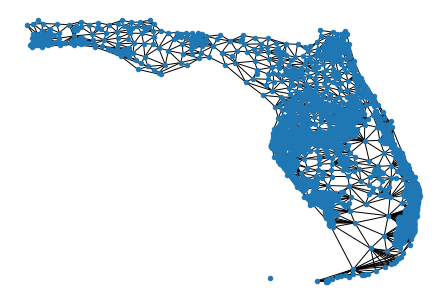

In [60]:
nx.draw(FL_dual_graph, pos = FL_geo_pos,node_size=20)

Now that we have access to a few social networks, it is time to start making some measurements. Networkx has implementations of many of the common network metrics and centrality scores (full documentation: https://networkx.org/documentation/stable//reference/algorithms/index.html, funny comic - we are attempting the tast in the third panel: https://xkcd.com/451/, and a thoughtful characterization paper: https://github.com/drdeford/Math_581_05/blob/master/Week_2/centflow.pdf Borgatti, S., Centrality and Network Flows, Social Networks, 27, 55-71, (2005).). 

We'll start with some examples of basic metrics that are applicable to both combinatorial graphs and networks before diving in to compare some of the centrality measures. 

In [28]:
print(f"The Karate Graph has {karate_graph.order()} nodes and {karate_graph.size()} edges.")

The Karate Graph has 34 nodes and 78 edges.


In [29]:
print(f"The diameter of the Karate Graph is {nx.diameter(karate_graph)} and its radius is {nx.radius(karate_graph)}.")

The diameter of the Karate Graph is 5 and its radius is 3.


In [30]:
print(f"The average shortest path distance between nodes in the Karate Graph is {nx.average_shortest_path_length(karate_graph)}")

The average shortest path distance between nodes in the Karate Graph is 2.408199643493761


In [31]:
print(f"The Karate Graph has {sum(nx.triangles(karate_graph).values())/3} triangles and a transitivity of {nx.transitivity(karate_graph)}")

The Karate Graph has 45.0 triangles and a transitivity of 0.2556818181818182


In [32]:
nx.triangles(karate_graph)

{0: 18,
 1: 12,
 2: 11,
 3: 10,
 4: 2,
 5: 3,
 6: 3,
 7: 6,
 8: 5,
 9: 0,
 10: 2,
 11: 0,
 12: 1,
 13: 6,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 4,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 4,
 30: 3,
 31: 3,
 32: 13,
 33: 15}

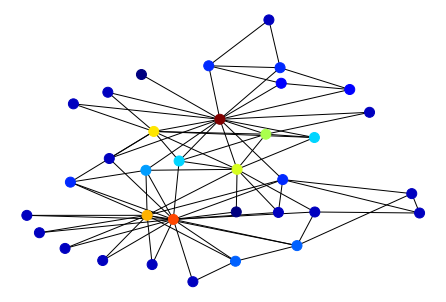

In [33]:
nx.draw(karate_graph,pos=karate_kk_layout, node_color = [nx.triangles(karate_graph)[name] for name in karate_graph.nodes()],node_size = 100, cmap='jet')

In [34]:
karate_degrees = nx.degree_centrality(karate_graph)
karate_eigs = nx.eigenvector_centrality(karate_graph)
karate_close = nx.closeness_centrality(karate_graph)
karate_between = nx.betweenness_centrality(karate_graph)

In [35]:
karate_eigs

{0: 0.3554834941851943,
 1: 0.2659538704545025,
 2: 0.31718938996844476,
 3: 0.2111740783205706,
 4: 0.07596645881657382,
 5: 0.07948057788594247,
 6: 0.07948057788594247,
 7: 0.17095511498035434,
 8: 0.2274050914716605,
 9: 0.10267519030637758,
 10: 0.07596645881657381,
 11: 0.05285416945233648,
 12: 0.08425192086558088,
 13: 0.22646969838808148,
 14: 0.10140627846270832,
 15: 0.10140627846270832,
 16: 0.023634794260596875,
 17: 0.09239675666845953,
 18: 0.10140627846270832,
 19: 0.14791134007618667,
 20: 0.10140627846270832,
 21: 0.09239675666845953,
 22: 0.10140627846270832,
 23: 0.15012328691726787,
 24: 0.05705373563802805,
 25: 0.05920820250279008,
 26: 0.07558192219009324,
 27: 0.13347932684333308,
 28: 0.13107925627221215,
 29: 0.13496528673866567,
 30: 0.17476027834493085,
 31: 0.19103626979791702,
 32: 0.3086510477336959,
 33: 0.373371213013235}

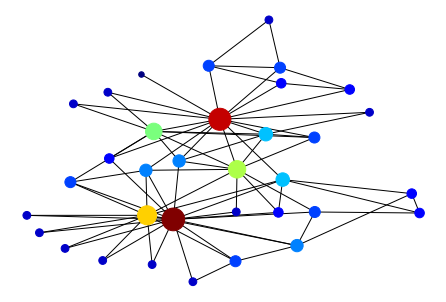

In [36]:
nx.draw(karate_graph,pos=karate_kk_layout, node_color = [karate_degrees[x] for x in karate_graph.nodes()],node_size = [1000*karate_degrees[x] for x in karate_graph.nodes()], cmap='jet')

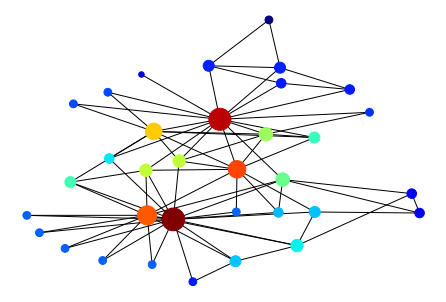

In [37]:
nx.draw(karate_graph, pos=karate_kk_layout,node_color = [karate_eigs[x] for x in karate_graph.nodes()],node_size = [1000*karate_degrees[x] for x in karate_graph.nodes()],cmap='jet')

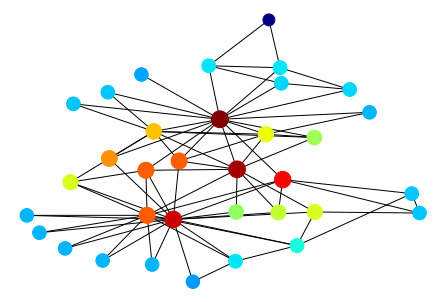

In [38]:
nx.draw(karate_graph,pos=karate_kk_layout, node_color = [karate_close[x] for x in karate_graph.nodes()],node_size = [500*karate_close[x] for x in karate_graph.nodes()], cmap='jet')

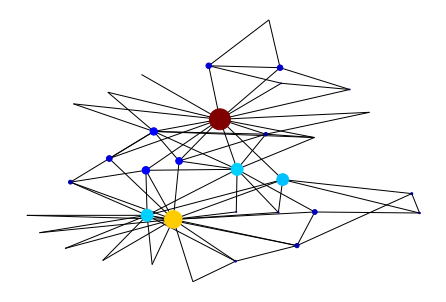

In [39]:
nx.draw(karate_graph,pos=karate_kk_layout, node_color = [karate_between[x] for x in karate_graph.nodes()],node_size = [1000*karate_between[x] for x in karate_graph.nodes()], cmap='jet')

**Assignment:** Compute several centrality measures for the dolphin dataset and make some plots comparing the measures. Which score seems to best capture the structure of the network? (medium scale trick question!)

**Comparison to random networks** Properties like high local clustering, short average path length, and long-tailed degree distributions are commonly observed in social networks. One natural question is what sort of baseline should we compare to in order to claim that we are seeing high or short values? Next, we will compare some of the nextwork properties that we measured on the Karate Graph to values observed on 100 Erdos-Renyi networks that are constructed to have the same number of nodes and expected degree. A widget exploring this idea more deeply can be found here: http://people.csail.mit.edu/ddeford/STS_Tufts.html

In [40]:
sizes = []
transitivities = []
triangles = []
avg_path_lengths = []
for i in range(100):
    er = nx.erdos_renyi_graph(karate_graph.order(),nx.density(karate_graph))
    if nx.is_connected(er):
        sizes.append(er.size())
        transitivities.append(nx.transitivity(er))
        triangles.append(sum(nx.triangles(er).values())/3)
        avg_path_lengths.append(nx.average_shortest_path_length(er))
    

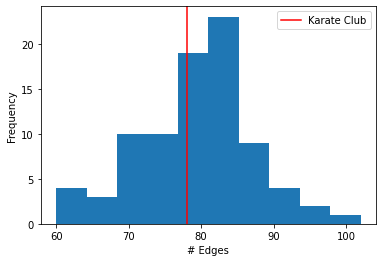

In [41]:
plt.hist(sizes)
plt.axvline(karate_graph.size(),color='red',label='Karate Club')
plt.xlabel('# Edges')
plt.ylabel('Frequency')
plt.legend()

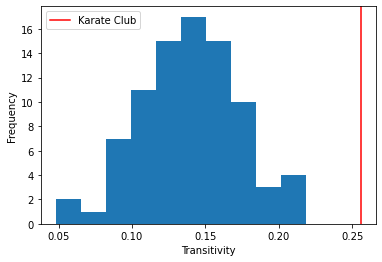

In [42]:
plt.hist(transitivities)
plt.axvline(nx.transitivity(karate_graph),color='red',label='Karate Club')
plt.xlabel('Transitivity')
plt.ylabel('Frequency')
plt.legend()

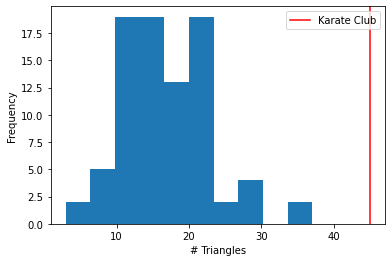

In [43]:
plt.hist(triangles)
plt.axvline(45,color='red',label='Karate Club')
plt.xlabel('# Triangles')
plt.ylabel('Frequency')
plt.legend()

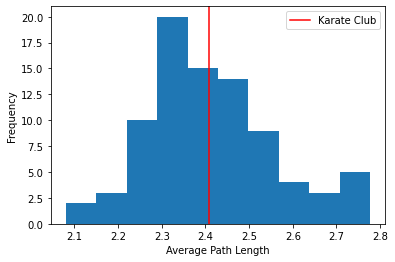

In [44]:
plt.hist(avg_path_lengths)
plt.axvline(nx.average_shortest_path_length(karate_graph),color='red',label='Karate Club')
plt.xlabel('Average Path Length')
plt.ylabel('Frequency')
plt.legend()

Text(0, 0.5, 'Frequency')

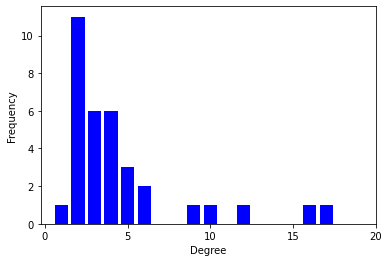

In [47]:
#It turns out that getting a degree histogram from networkx is a little awkward, this example is from the documentation https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree_histogram.html
import collections
degree_sequence = sorted([d for n, d in karate_graph.degree()], reverse=True)  
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")
plt.xticks([0,5,10,15,20],[0,5,10,15,20])
plt.xlabel('Degree')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

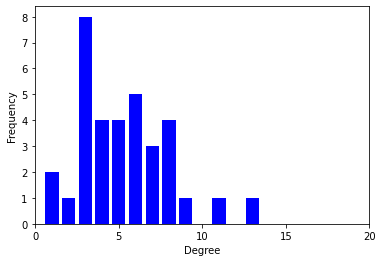

In [48]:
degree_sequence = sorted([d for n, d in er.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")
plt.xticks([0,5,10,15,20],[0,5,10,15,20])
plt.xlabel('Degree')
plt.ylabel('Frequency')

**Assignment:** Repeat this null model analysis comparing to the dolphins graph. Which metrics distinguish the dolphin data from the random networks? For an extra challenge, replace the Erdos-Renyi graphs with another random graph family. 